### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [159]:
data = pd.read_csv('data/coupons.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [160]:
#check which data is missing
print(data.isnull().sum())


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [161]:
data.drop(['car'], axis=1, inplace=True) # drop car column
data.dropna(inplace=True)  # remove missing data columns This will modify the original DataFrame

data.info()
#12576 - 12079 = 497 entries dropped ~4% 

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null  ob

4. What proportion of the total observations chose to accept the coupon? 



In [162]:
print (data['Y'].value_counts())
print ("Propotions of the total observations chose to accept the coupon %: ", round(data['Y'].value_counts(normalize=True)
                                                                                   [1] *100,2 ) )



Y
1    6877
0    5202
Name: count, dtype: int64
Propotions of the total observations chose to accept the coupon %:  56.93


5. Use a bar plot to visualize the `coupon` column.

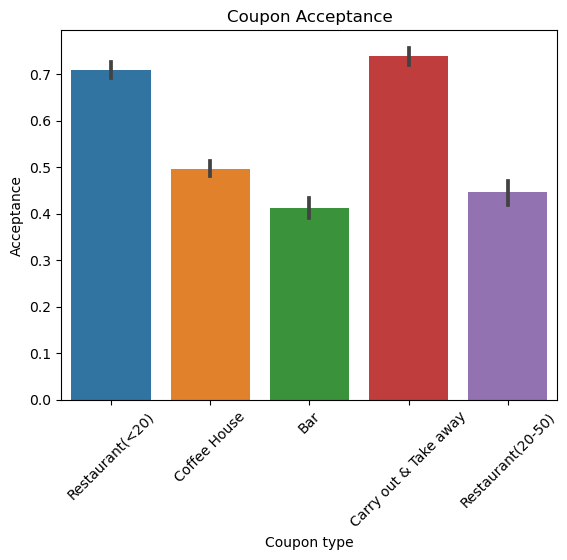

In [163]:
sns.barplot(x='coupon', y='Y', data=data)

# Add labels and title
plt.xlabel('Coupon type')
plt.ylabel('Acceptance')
plt.title('Coupon Acceptance')

# Rotate x-axis labels 
plt.xticks(rotation=45)

# display the plot
plt.show()

6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

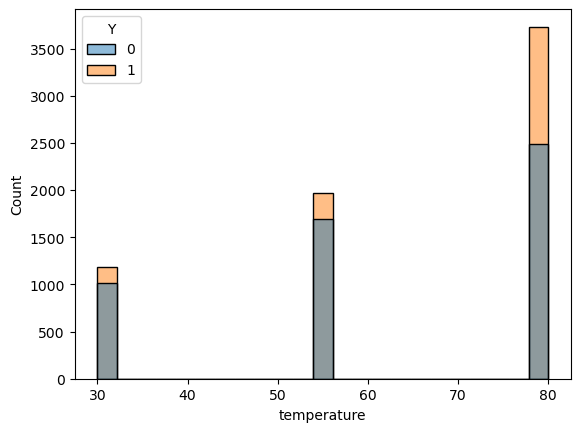

In [164]:
sns.histplot(data,x='temperature',hue='Y')
# seems warmer temperature has more coupan acceptance

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [165]:
bar_data = data[data['coupon']=='Bar']


2. What proportion of bar coupons were accepted?


In [166]:
bar_data['Y'].value_counts()
print ("Propotions of the bar coupon accepted % : ", round(bar_data['Y'].value_counts(normalize=True)[1]*100,2))


Propotions of the bar coupon accepted % :  41.19


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [167]:
bar_3orless = bar_data.loc[bar_data['Bar'].isin(['never', 'less1', '1~3'])]['Y'].mean()
bar_4ormore = bar_data.loc[bar_data['Bar'].isin(['4~8','gt8'])]['Y'].mean()
print (round(bar_3orless *100,2) , "% is the acceptance rate for who went to a bar 3 or fewer times a month\n")
print (round(bar_4ormore *100,2) , "is the acceptance rate for who went to 4 or more times a month")


37.27 % is the acceptance rate for who went to a bar 3 or fewer times a month

76.17 is the acceptance rate for who went to 4 or more times a month


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [168]:
# filer by drivers who go to a bar more than once a month => bar_data['Bar'].isin(['1~3', '4~8', 'gt8']
# filter by over the age of 25 => bar_data['age'].isin(['26', '31', '50plus', '36', '41', '46'

age_25_1m_bar = bar_data[
    ((bar_data['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
     (bar_data['age'].isin(['26', '31', '50plus', '36', '41', '46'])))
]
print("Number of drivers above aged 25 and go to bar atleast once a month who accepted = ",  age_25_1m_bar['Y'].sum())

#filter others
# drivers who does not go to a bar more than once a month and above age 25
# All the drivers below age 25
others_bar = bar_data[ 
      (~(bar_data['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_data['age'].isin(['26', '31', '50plus', '36', '41', '46']))) |
               bar_data['age'].isin({'21','below21'}) 

]

print ("Number of rest of the drivers who go to bar aceecpted = ",others_bar['Y'].sum()) 


print("\nAcceptance Rate  for Number of drivers above aged 25 and go to bar atleast once a month  = ",round(age_25_1m_bar['Y'].mean()*100,2))
print ("Acceptance Rate  for Number of rest of the drivers who go to bar  = ", round(others_bar['Y'].mean()*100 ,2) )

Number of drivers above aged 25 and go to bar atleast once a month who accepted =  278
Number of rest of the drivers who go to bar aceecpted =  510

Acceptance Rate  for Number of drivers above aged 25 and go to bar atleast once a month  =  68.98
Acceptance Rate  for Number of rest of the drivers who go to bar  =  33.77


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [169]:
#
#bar_data[
#         bar_data['Bar'].isin({'1~3', '4~8', 'gt8'}) &
#         (bar_data['passanger'] != 'Kid(s)')  & 
#         bar_data['occupation'] != 'farming, fishing, or forestry'
#].groupby('Bar')['Y'].mean().mean()
    
bar_more_1 = bar_data[bar_data['Bar'].isin({'1~3', '4~8', 'gt8'})]['Y'].mean()
psngr_no_kid = bar_data[bar_data['passanger'] != 'Kid(s)']['Y'].mean()
occup_no_fff = bar_data[bar_data['occupation'] != 'farming, fishing, or forestry']['Y'].mean()

print ("Acceptance Rate for drivers who go to bars more than once a month = ", round(bar_more_1*100,2))
print ("Acceptance Rate for drivers who had passengers that were not a kid = ",round(psngr_no_kid*100,2))
print ("Acceptance Rate for drivers who had occupations other than farming, fishing, or forestry = "  ,round(occup_no_fff*100,2))


Acceptance Rate for drivers who go to bars more than once a month =  68.53
Acceptance Rate for drivers who had passengers that were not a kid =  43.51
Acceptance Rate for drivers who had occupations other than farming, fishing, or forestry =  41.19


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [170]:
#go to bars more than once a month, had passengers that were not a kid, and were not widowed
bar1_no_kid_no_widowed = bar_data[
      (bar_data['Bar'].isin({'1~3', '4~8', 'gt8'}) )&
      (bar_data['passanger'] != 'Kid(s)') &
      (bar_data['maritalStatus'] != 'Widowed')
]["Y"].mean()
# go to bars more than once a month and are under the age of 30
bar1_undr30 = bar_data[
      bar_data['Bar'].isin({'1~3', '4~8', 'gt8'}) &
      (bar_data['age'].isin({'below21','21','26'}))
]["Y"].mean()
# go to cheap restaurants more than 4 times a month and income is less than 50K    
chp_rest_less_50k = bar_data[
    bar_data['RestaurantLessThan20'].isin({'4~8','gt8'}) &
    bar_data['income'].isin({'Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999'})
]["Y"].mean()

print(round(bar1_no_kid_no_widowed*100,2), "% Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed ")
print(round(bar1_undr30*100,2), "% Acceptance rate for drivers who go to bars more than once a month and are under the age of 30")
print(round(chp_rest_less_50k*100,2), "% Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K")


70.94 % Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed 
71.95 % Acceptance rate for drivers who go to bars more than once a month and are under the age of 30
45.65 % Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

1. Drivers below 30 (Young) and who go to bar nore than once a month are more likely to accept bar coupans.
2. Coupan Acceptance rate for drivers who go to bar once a month is almost same as Drivers below 30 (Young) and who go to bar nore than once a month
3. There no Widowed who go to bars more than once a month, had passengers that were not a kid
4. Acceptance Rate  for Number of drivers above aged 25 and go to bar atleast once a month is more than twice than the rest of the drivers
5. acceptance rate for who went to 4 or more times a month is more than twice than the the acceptance rate for who went to a bar 3 or fewer times a month

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [171]:
rest20_data = data[data['coupon']=='Restaurant(<20)']


which income level has the highest acceptance rate for  Restaurent(<20) category ?

In [172]:

rest20_data[rest20_data['income'].isin({'Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999'})]['Y'].mean()
rest20_data.groupby('income')['Y'].mean().sort_values().iloc[-1:]

income
$50000 - $62499    0.773414
Name: Y, dtype: float64

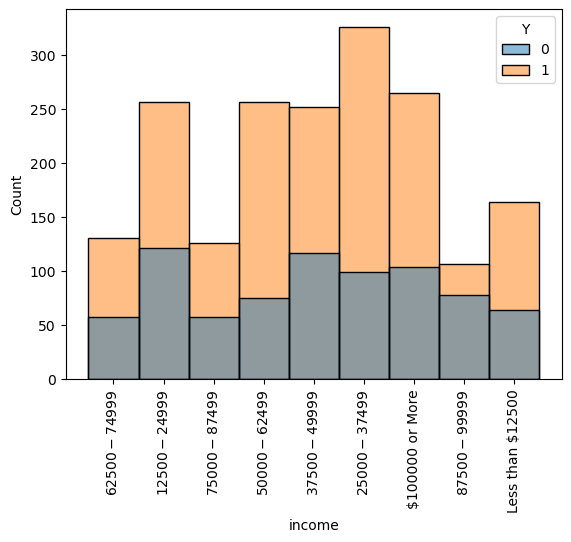

In [173]:
sns.histplot(rest20_data,x=rest20_data['income'],hue='Y')
plt.xticks(rotation=90)

# Show the plot
plt.show()

<Axes: xlabel='time', ylabel='Count'>

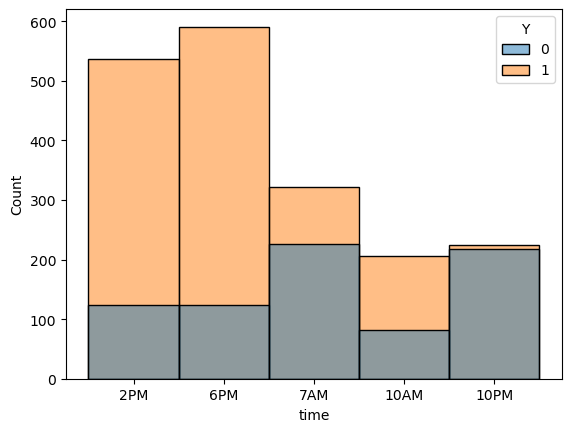

In [174]:
sns.histplot(rest20_data,x=rest20_data['time'],hue='Y')

Who Accepts more Restaurent<20 coupans ? High Income High Education or Low Income Low Education ?
Both has similar Acceptance rate

In [175]:
high_income_high_edu_rest20 = rest20_data[(rest20_data['income'] =='$100000 or More') & (rest20_data['education'] == 'Graduate degree (Masters or Doctorate)') ]['Y'].mean()
rest20_data[(rest20_data['income'] =='$100000 or More') & (rest20_data['education'] == 'Graduate degree (Masters or Doctorate)') ]['Y'].mean()
low_income_low_edu_rest20 = rest20_data[((rest20_data['income'] =='Less than $12500') | (rest20_data['income'] =='$12500 - $24999')) & 
            ((rest20_data['education'] == 'High School Graduate') | (rest20_data['education'] == 'Some High School')) ]['Y'].mean()

print ("Acceptance rate for High Income High Education for Restaurant(<20) is ", round(high_income_high_edu_rest20*100,2))
print ("Acceptance rate for Low Income Low Education for Restaurant(<20) is ", round(low_income_low_edu_rest20*100,2))
     

Acceptance rate for High Income High Education for Restaurant(<20) is  78.08
Acceptance rate for Low Income Low Education for Restaurant(<20) is  75.79


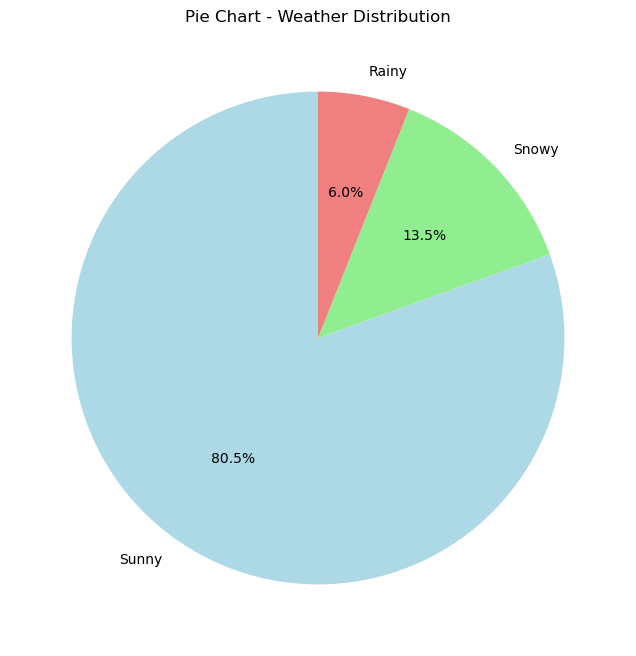

In [176]:
# which weather has more acceptance for coupon ?
plt.figure(figsize=(8, 8))
rest20_data['weather'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Pie Chart - Weather Distribution')
plt.ylabel('')
plt.show()

Acceptance rate for the drivers who never go to RestaurantLessThan20  
Surprisingly more than 50% of drivers who never go to RestaurantLessThan20 accepts RestaurantLessThan20 coupon

In [177]:
rest20_never = rest20_data[(rest20_data['RestaurantLessThan20'] =='never')]['Y'].mean()
print ("Acceptance rate for the drivers who never go to RestaurantLessThan20  ", round(rest20_never*100,2))

Acceptance rate for the drivers who never go to RestaurantLessThan20   62.79


In [178]:
rest20_data.groupby('time')['Y'].mean()
#rest20_data[(rest20_data['time']== '10PM') & ( (rest20_data['maritalStatus']== 'Unmarried partner') | (rest20_data['maritalStatus']== 'Married partner') )]['Y'].mean()
#rest20_data[(rest20_data['time']== '10PM') & ( (rest20_data['maritalStatus']== 'Divorced') | (rest20_data['maritalStatus']== 'Single') | (rest20_data['maritalStatus']== 'Widowed'))]['Y'].mean()

rest20_data[ ( (rest20_data['maritalStatus']== 'Unmarried partner') | (rest20_data['maritalStatus']== 'Married partner') )]['Y'].mean()
#rest20_data[ ( (rest20_data['maritalStatus']== 'Divorced') | (rest20_data['maritalStatus']== 'Single') | (rest20_data['maritalStatus']== 'Widowed'))]['Y'].mean()
rest20_data.groupby('expiration')['Y'].mean()


expiration
1d    0.835913
2h    0.588538
Name: Y, dtype: float64

# some more plots to see 

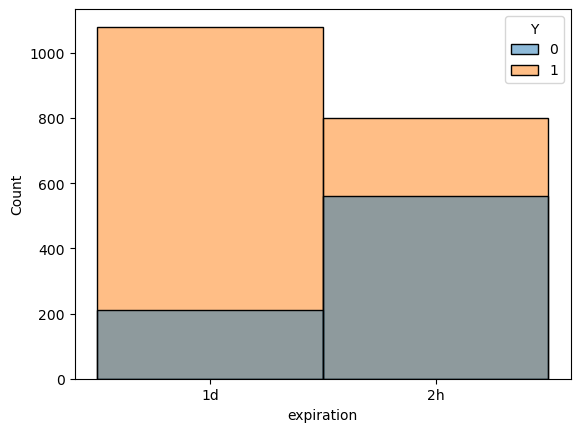

In [179]:
sns.histplot(rest20_data,x=rest20_data['expiration'],hue='Y')

# Show the plot
plt.show()
#more Acceptance for one day expiry coupon than 2 hours

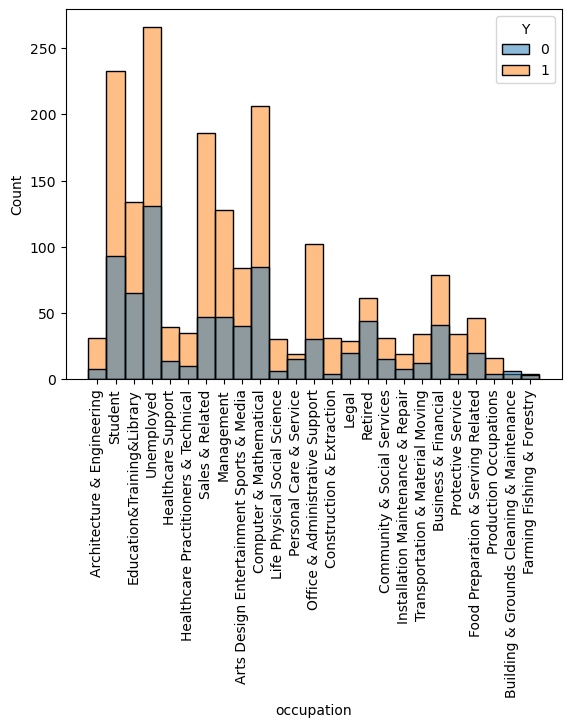

In [180]:
sns.histplot(rest20_data,x=rest20_data['occupation'],hue='Y')
plt.xticks(rotation=90)

# Show the plot
plt.show()